In [16]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import matplotlib

In [2]:
api_key = XXX
my_headers = {'Authorization': 'Bearer {}'.format(api_key)}  

## Enter Player Tag to Pull

In [3]:
playerTag = '23PPY9U9RV'

In [4]:
response = requests.get('https://api.brawlstars.com/v1/players/%{}'.format(playerTag), headers=my_headers)

In [5]:
response

<Response [200]>

## Format Data from the Json

In [6]:
name = []
power = []
trophies = []
for brawler in response.json()['brawlers']:
    name.append(brawler['name'])
    power.append(brawler['power'])
    trophies.append(brawler['trophies'])

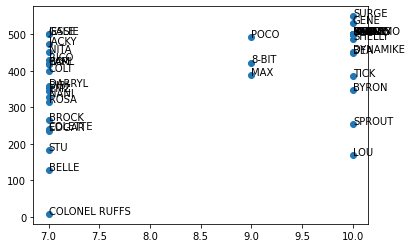

In [7]:
fig, ax = plt.subplots()
ax.scatter(power, trophies)

for i, txt in enumerate(name):
    ax.annotate(txt, (power[i], trophies[i]))

## Scatter plot is too mess, lets create an ordered bar

In [9]:
df = pd.DataFrame({
    'Brawler':name,
    'Power':power,
    'Trophies':trophies
})

In [10]:
df_Trophies = df.sort_values('Trophies',ascending = True)

In [11]:
df_Trophies['Brawler'][-20:]

7         NITA
8     DYNAMIKE
31       JACKY
0       SHELLY
11        POCO
18       FRANK
29       MR. P
17       PENNY
15        TARA
32        GALE
13       PIPER
10      MORTIS
9     EL PRIMO
6       JESSIE
5       BARLEY
2         BULL
26       SANDY
21        LEON
19        GENE
35       SURGE
Name: Brawler, dtype: object

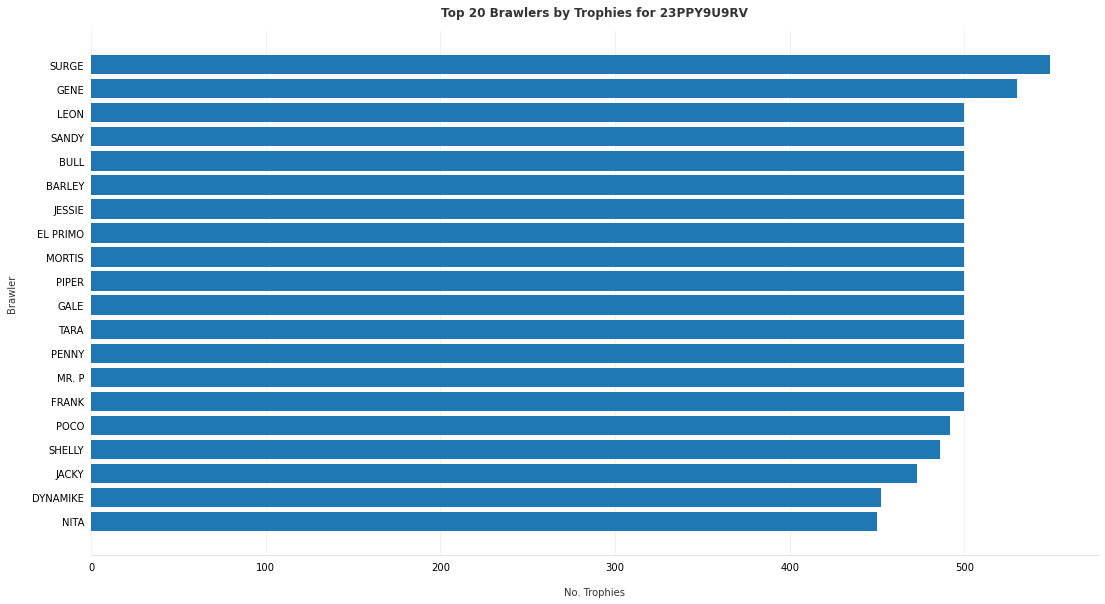

In [17]:
fig, ax = plt.subplots()

ax.barh(df_Trophies['Brawler'][-20:],df_Trophies['Trophies'][-20:])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)

ax.set_axisbelow(True)
ax.yaxis.grid(False)
ax.xaxis.grid(True, color='#EEEEEE')

ax.set_xlabel('No. Trophies', labelpad=15, color='#333333')
ax.set_ylabel('Brawler', labelpad=15, color='#333333')
ax.set_title('Top 20 Brawlers by Trophies for {}'.format(playerTag), pad=15, color='#333333',
             weight='bold')

fig.tight_layout()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
